### Problem Statement
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all
irrespective of any status. Required to analyze this health and medical data for better
future preparation.


### Objectives

Do ETL: Extract- Transform and Load data from the heart disease diagnostic database
Perform EDA through python. The database extracts various information such as Heart disease rates, Heart disease by gender, by age.
Compare attributes of the data set to extract necessary information. Use various visualization
and features and make the best dashboard
Find key metrics and factors and show the meaningful relationships between attribute

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data
df = pd.read_csv("Heart Disease data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Data Dictionary

Attribute Information:

1. age
2. sex
3. cp = chest pain type (4 values)
4. trestbps= resting blood pressure
5. chol = serum cholestoral in mg/dl
6. fbs= fasting blood sugar > 120 mg/dl
7. restecg = resting electrocardiographic results (values 0,1,2)
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
    the slope of the peak exercise ST segment
11. number of major vessels (0-3) colored by flourosopy
12. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### Data Preprocessing

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# rename the columns for better readability
df.rename(columns = {"age":"Age","sex":"Gender","cp":"Chest_Pain","trestbps":"Resting_BP","chol":"Cholesterol",
                     "fbs":"Fasting_Blood_sugar","restecg":"Resting_ECG","thalach":"Max_heart_rate","exang":"Exercise_Induced_angina",
                    "oldpeak":"Oldpeak","slope":"Slope","ca":"No_of_Major_Vessels","thal":"Thal_defect_Type","target":"Heart_disease"} , inplace = True)

In [5]:
df.head()

,Age,Gender,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_sugar,Resting_ECG,Max_heart_rate,Exercise_Induced_angina,Oldpeak,Slope,No_of_Major_Vessels,Thal_defect_Type,Heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Replacing the values in columns 

In [6]:
# Gender
df["Gender"] = df["Gender"].replace({1:"Male" , 0: "Female"})

In [7]:
df["Chest_Pain"].value_counts()

0    497
2    284
1    167
3     77
Name: Chest_Pain, dtype: int64

In [8]:
# Chest_Pain

df["Chest_Pain"] = df["Chest_Pain"].replace({0:"Atypical Angina",1:"Typical Angina",2:"Asymptomatic",3:"Nonanginal Pain"})
# df.head()

In [9]:
df["Fasting_Blood_sugar"].value_counts()

0    872
1    153
Name: Fasting_Blood_sugar, dtype: int64

In [10]:
# Fasting_Blood_sugar
df["Fasting_Blood_sugar"] = df["Fasting_Blood_sugar"].replace({0:"False",1:"True"})

In [11]:
df["Resting_ECG"].value_counts()

1    513
0    497
2     15
Name: Resting_ECG, dtype: int64

In [12]:
# Resting_ECG
df["Resting_ECG"] = df["Resting_ECG"].replace({0:"Normal",1:"having ST-T",2:"Hypertrophy"})

In [13]:
df["Exercise_Induced_angina"].value_counts()

0    680
1    345
Name: Exercise_Induced_angina, dtype: int64

In [14]:
# Exercise_Induced_angina
df["Exercise_Induced_angina"] = df["Exercise_Induced_angina"].replace({0:"No",1:"Yes"})

In [15]:
df["Slope"].value_counts()

1    482
2    469
0     74
Name: Slope, dtype: int64

In [16]:
# Slope
df["Slope"] = df["Slope"].replace({0:"Up Sloping",1:"Flat",2:"Down Sloping"})

In [17]:
df["Heart_disease"].value_counts()

1    526
0    499
Name: Heart_disease, dtype: int64

In [18]:
# Heart_disease
df["Heart_disease"] = df["Heart_disease"].replace({0:"Negative",1:"Positive"})

In [19]:
df.head()

,Age,Gender,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_sugar,Resting_ECG,Max_heart_rate,Exercise_Induced_angina,Oldpeak,Slope,No_of_Major_Vessels,Thal_defect_Type,Heart_disease
0,52,Male,Atypical Angina,125,212,False,having ST-T,168,No,1.0,Down Sloping,2,3,Negative
1,53,Male,Atypical Angina,140,203,True,Normal,155,Yes,3.1,Up Sloping,0,3,Negative
2,70,Male,Atypical Angina,145,174,False,having ST-T,125,Yes,2.6,Up Sloping,0,3,Negative
3,61,Male,Atypical Angina,148,203,False,having ST-T,161,No,0.0,Down Sloping,1,3,Negative
4,62,Female,Atypical Angina,138,294,True,having ST-T,106,No,1.9,Flat,3,2,Negative


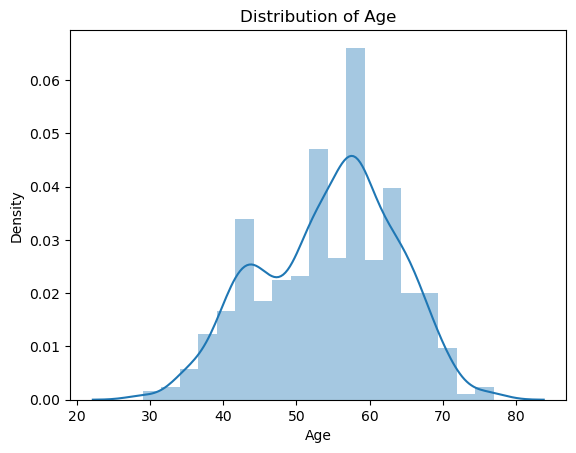

In [20]:
# plot the distribution of age
sns.distplot(df["Age"])
plt.title("Distribution of Age")
plt.show()

People with age between 40 to 60 are more.

In [21]:
# Print minimum , maximum and avearge of age to make categories
min = df["Age"].min()
mid = round(df["Age"].mean())
max = df["Age"].max()
print("minimum age",min)
print("Average age",mid)
print("Maximum age",max)

minimum age 29
Average age 54
Maximum age 77


In [22]:
# define age categories according to the age distributed
def Age_category(row):
    if row >= 20  and row <35:
        return "Young Aged"
    elif row >= 35 and row <50:
        return "Middle Aged"
    elif row >=50:
        return "Elder Aged"     

In [23]:
# Create new column with values of age categories
df["Age_category"] = df["Age"].apply(Age_category)
df.head()

,Age,Gender,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_sugar,Resting_ECG,Max_heart_rate,Exercise_Induced_angina,Oldpeak,Slope,No_of_Major_Vessels,Thal_defect_Type,Heart_disease,Age_category
0,52,Male,Atypical Angina,125,212,False,having ST-T,168,No,1.0,Down Sloping,2,3,Negative,Elder Aged
1,53,Male,Atypical Angina,140,203,True,Normal,155,Yes,3.1,Up Sloping,0,3,Negative,Elder Aged
2,70,Male,Atypical Angina,145,174,False,having ST-T,125,Yes,2.6,Up Sloping,0,3,Negative,Elder Aged
3,61,Male,Atypical Angina,148,203,False,having ST-T,161,No,0.0,Down Sloping,1,3,Negative,Elder Aged
4,62,Female,Atypical Angina,138,294,True,having ST-T,106,No,1.9,Flat,3,2,Negative,Elder Aged


## Data Visualization

#### Univariate Analysis

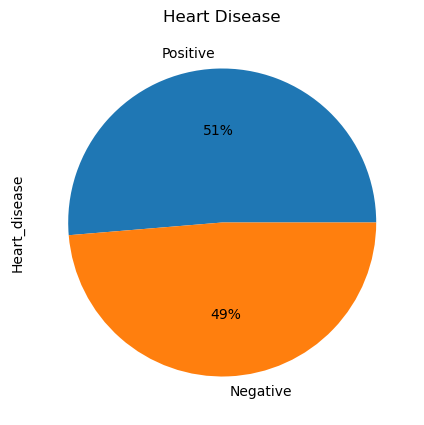

In [24]:
# plot the percentage of heart disease whether it is positive or negative
plt.figure(figsize=(10,5))
df["Heart_disease"].value_counts(normalize = True).plot.pie(autopct ="%1.0f%%")
plt.title("Heart Disease")
plt.show()

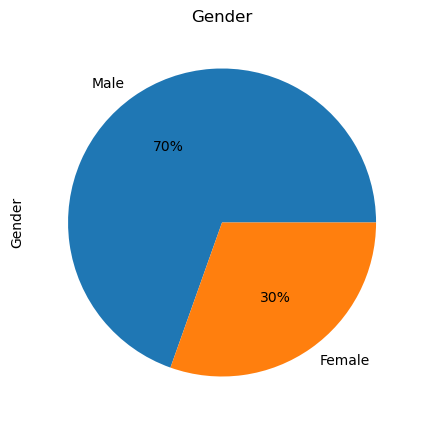

In [25]:
# See percent distribution of gender
plt.figure(figsize=(10,5))
df["Gender"].value_counts(normalize = True).plot.pie(autopct ="%1.0f%%")
plt.title("Gender")
plt.show()

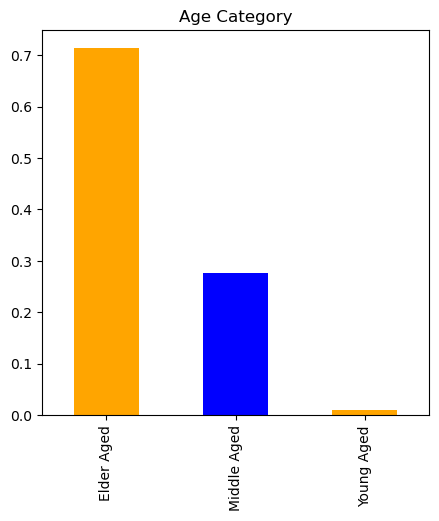

In [26]:
# plot age categories 
plt.figure(figsize=(5,5))
df["Age_category"].value_counts(normalize = True).plot.bar(color = ["orange","blue"])
plt.title("Age Category")
plt.show()

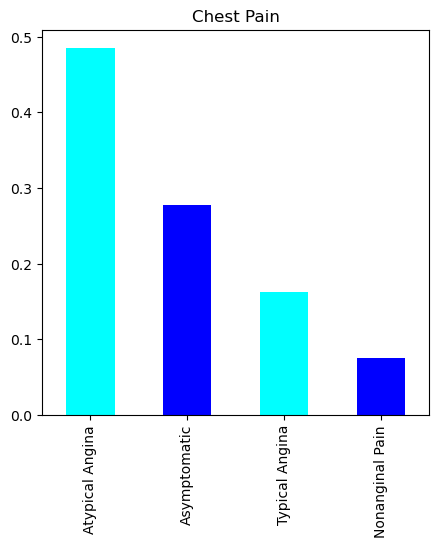

In [27]:
# plot types of chest pain and their frequencies
plt.figure(figsize=(5,5))
df["Chest_Pain"].value_counts(normalize = True).plot.bar(color = ["cyan","blue"])
plt.title("Chest Pain")
plt.show()

#### Bivariate Analysis with target variable , Heart_disease

In [28]:
df.head()

,Age,Gender,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_sugar,Resting_ECG,Max_heart_rate,Exercise_Induced_angina,Oldpeak,Slope,No_of_Major_Vessels,Thal_defect_Type,Heart_disease,Age_category
0,52,Male,Atypical Angina,125,212,False,having ST-T,168,No,1.0,Down Sloping,2,3,Negative,Elder Aged
1,53,Male,Atypical Angina,140,203,True,Normal,155,Yes,3.1,Up Sloping,0,3,Negative,Elder Aged
2,70,Male,Atypical Angina,145,174,False,having ST-T,125,Yes,2.6,Up Sloping,0,3,Negative,Elder Aged
3,61,Male,Atypical Angina,148,203,False,having ST-T,161,No,0.0,Down Sloping,1,3,Negative,Elder Aged
4,62,Female,Atypical Angina,138,294,True,having ST-T,106,No,1.9,Flat,3,2,Negative,Elder Aged


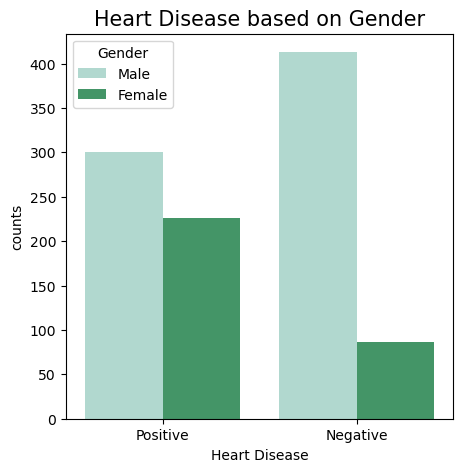

In [29]:
# plot heart disease based on Gender
plt.figure(figsize = (5,5))
sns.countplot(x = df["Heart_disease"],hue = "Gender",data = df,order=["Positive","Negative"],palette="BuGn")
plt.title("Heart Disease based on Gender" , fontsize = 15)
plt.xlabel("Heart Disease" , fontsize = 10)
plt.ylabel("counts" , fontsize = 10)
plt.show()

According to plot males are more likely to have heart diseases than females.

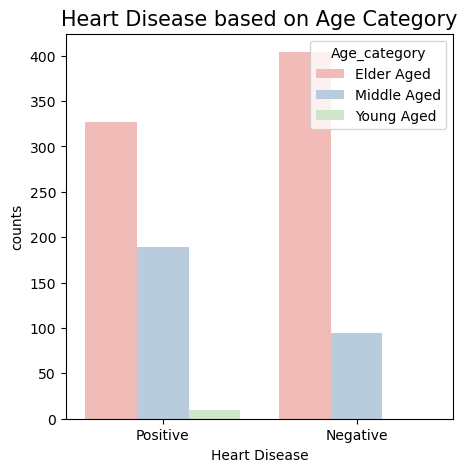

In [30]:
# Heart Disease based on Age Category
plt.figure(figsize = (5,5))
sns.countplot(x = df["Heart_disease"] ,hue = "Age_category", data = df,order=["Positive","Negative"],palette = "Pastel1")
plt.title("Heart Disease based on Age Category" , fontsize = 15)
plt.xlabel("Heart Disease" , fontsize = 10)
plt.ylabel("counts" , fontsize = 10)
plt.show()

Elder aged or people with age greater than 50 are more positive with the disease.

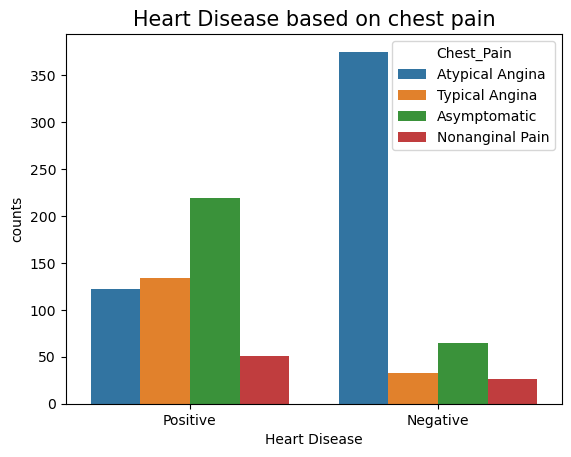

In [31]:
# Heart Disease based on chest pain
# plt.figure(figsize = (10,5))
sns.countplot(x = df["Heart_disease"] ,hue = "Chest_Pain", data = df,order=["Positive","Negative"])
plt.title("Heart Disease based on chest pain",fontsize = 15)
plt.xlabel("Heart Disease" , fontsize = 10)
plt.ylabel("counts" , fontsize = 10)
plt.show()

-> It seems people having Symptomatic chest pain have a higher chance of heart disease

-> Atypical Angina Chest pain means neither causing nor exhibiting symptoms of Heart disease.

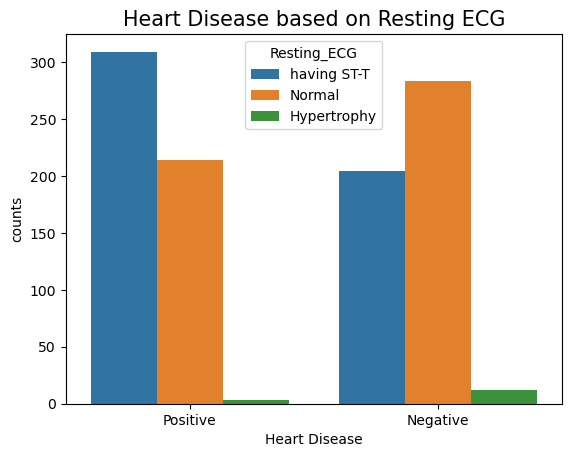

In [32]:
# Heart Disease based on Resting ECG
# plt.figure(figsize = (10,5))
sns.countplot(x = df["Heart_disease"] ,hue = "Resting_ECG", data = df,order=["Positive","Negative"])
plt.title("Heart Disease based on Resting ECG",fontsize = 15)
plt.xlabel("Heart Disease" , fontsize = 10)
plt.ylabel("counts" , fontsize = 10)
plt.show()

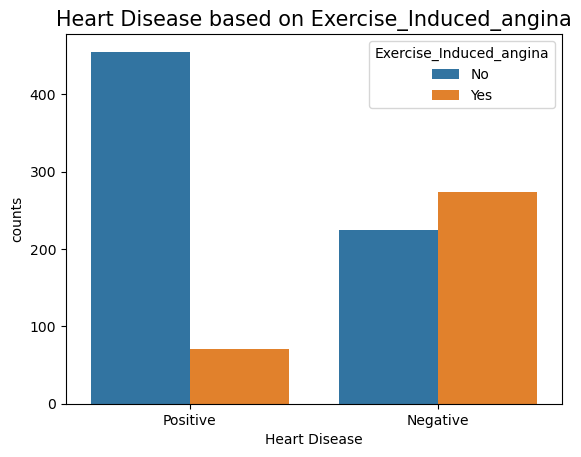

In [33]:
# Heart Disease based on Exercise_Induced_angina
sns.countplot(x = df["Heart_disease"] ,hue = "Exercise_Induced_angina", data = df,order=["Positive","Negative"])
plt.title("Heart Disease based on Exercise_Induced_angina",fontsize = 15)
plt.xlabel("Heart Disease" , fontsize = 10)
plt.ylabel("counts" , fontsize = 10)
plt.show()

People with no exercise induced anginal pain are having heart diseases

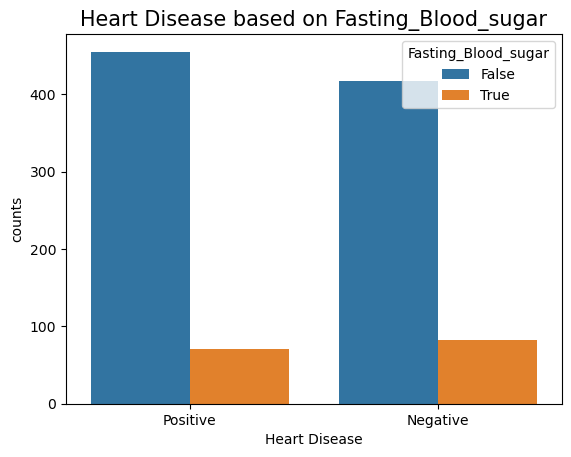

In [34]:
# Heart Disease based on Fasting_Blood_sugar
sns.countplot(x = df["Heart_disease"] ,hue = "Fasting_Blood_sugar", data = df,order=["Positive","Negative"])
plt.title("Heart Disease based on Fasting_Blood_sugar",fontsize = 15)
plt.xlabel("Heart Disease" , fontsize = 10)
plt.ylabel("counts" , fontsize = 10)
plt.show()

In [35]:
df.head()

,Age,Gender,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_sugar,Resting_ECG,Max_heart_rate,Exercise_Induced_angina,Oldpeak,Slope,No_of_Major_Vessels,Thal_defect_Type,Heart_disease,Age_category
0,52,Male,Atypical Angina,125,212,False,having ST-T,168,No,1.0,Down Sloping,2,3,Negative,Elder Aged
1,53,Male,Atypical Angina,140,203,True,Normal,155,Yes,3.1,Up Sloping,0,3,Negative,Elder Aged
2,70,Male,Atypical Angina,145,174,False,having ST-T,125,Yes,2.6,Up Sloping,0,3,Negative,Elder Aged
3,61,Male,Atypical Angina,148,203,False,having ST-T,161,No,0.0,Down Sloping,1,3,Negative,Elder Aged
4,62,Female,Atypical Angina,138,294,True,having ST-T,106,No,1.9,Flat,3,2,Negative,Elder Aged


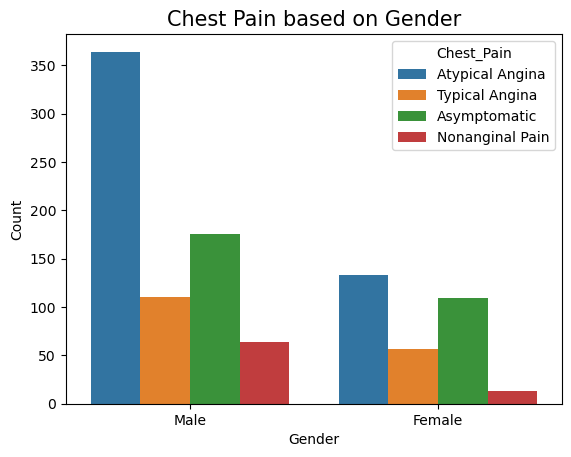

In [36]:
# countplot of chest pain based on gender
sns.countplot(x = df["Gender"] , hue = "Chest_Pain" , data = df)
plt.title("Chest Pain based on Gender",fontsize = 15)
plt.xlabel("Gender",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.show()

-> We can see that a higher number of men are suffering from Atypical Angina type of Chest Pain

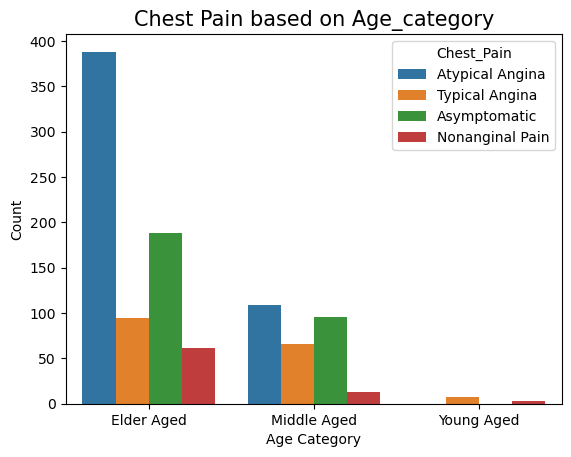

In [37]:
# countplot of chest pain based on age category
sns.countplot(x = df["Age_category"], hue = "Chest_Pain" , data = df)
plt.title("Chest Pain based on Age_category",fontsize = 15)
plt.xlabel("Age Category",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.show()

Elder aged people are having more chest pain than middle aged and young aged people.

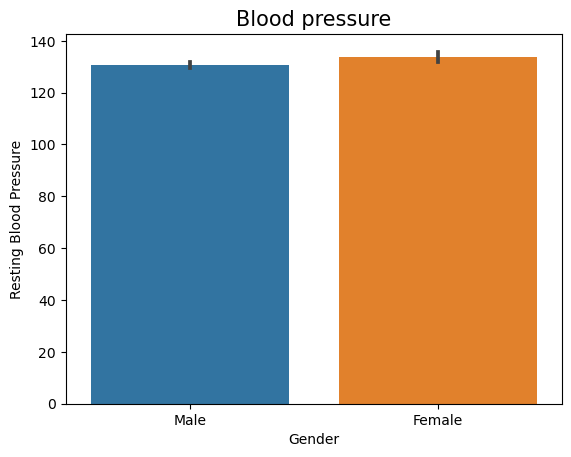

In [38]:
sns.barplot(x="Gender" , y ="Resting_BP" , data = df)
plt.title("Blood pressure", fontsize = 15)
plt.xlabel("Gender",fontsize = 10)
plt.ylabel("Resting Blood Pressure",fontsize = 10)
plt.show()

Genderwise distribution of Blood Pressure is same for both males and females.

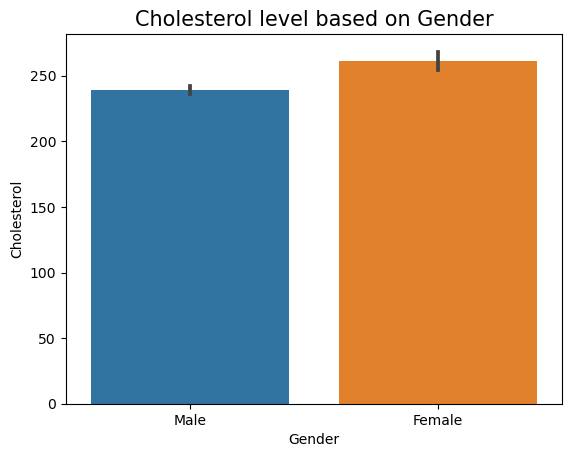

In [39]:
# plot of Cholesterol level based on Gender
sns.barplot(x="Gender" , y ="Cholesterol" , data = df)
plt.title("Cholesterol level based on Gender", fontsize = 15)
plt.xlabel("Gender",fontsize = 10)
plt.ylabel("Cholesterol",fontsize = 10)
plt.show()

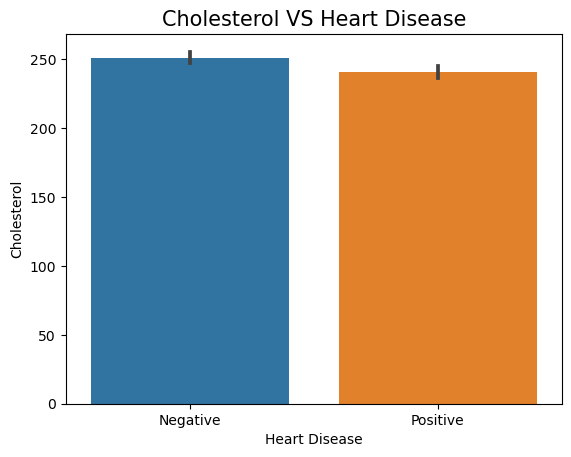

In [40]:
# Cholesterol VS Heart Disease
sns.barplot(x="Heart_disease" , y ="Cholesterol" , data = df)
plt.title("Cholesterol VS Heart Disease", fontsize = 15)
plt.xlabel("Heart Disease",fontsize = 10)
plt.ylabel("Cholesterol",fontsize = 10)
plt.show()

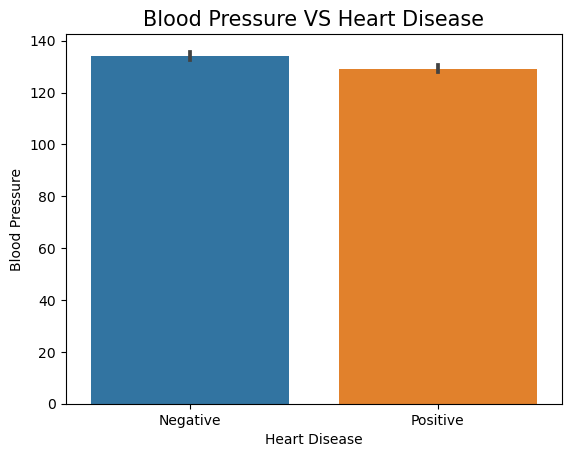

In [41]:
# Blood Pressure VS Heart Disease
sns.barplot(x="Heart_disease" , y ="Resting_BP" , data = df)
plt.title("Blood Pressure VS Heart Disease", fontsize = 15)
plt.xlabel("Heart Disease",fontsize = 10)
plt.ylabel("Blood Pressure",fontsize = 10)
plt.show()

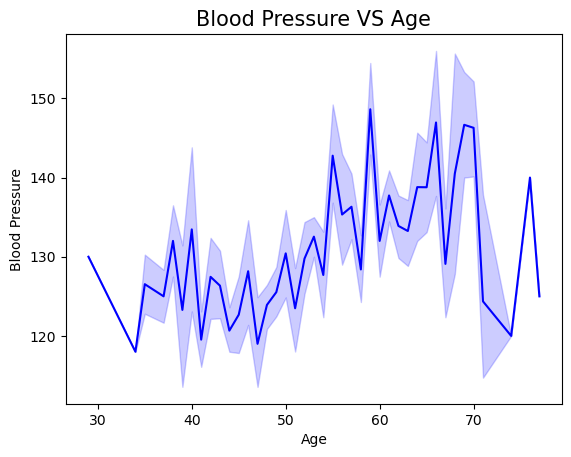

In [42]:
# plot blood pressure vs Age
sns.lineplot(x="Age" , y = "Resting_BP" , data = df , color = "blue")
plt.title("Blood Pressure VS Age",fontsize = 15)
plt.xlabel("Age",fontsize = 10)
plt.ylabel("Blood Pressure" , fontsize = 10)
plt.show()

-> Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

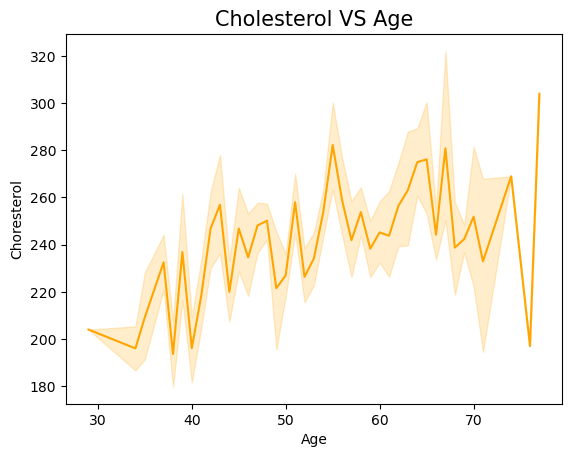

In [43]:
# lineplot of cholesterol Vs Age
sns.lineplot(x="Age" , y = "Cholesterol" , data = df , color = "orange")
plt.title("Cholesterol VS Age",fontsize = 15)
plt.xlabel("Age",fontsize = 10)
plt.ylabel("Choresterol" , fontsize = 10)
plt.show()

Similarly Cholestrol Increasing in the age group of 40-60

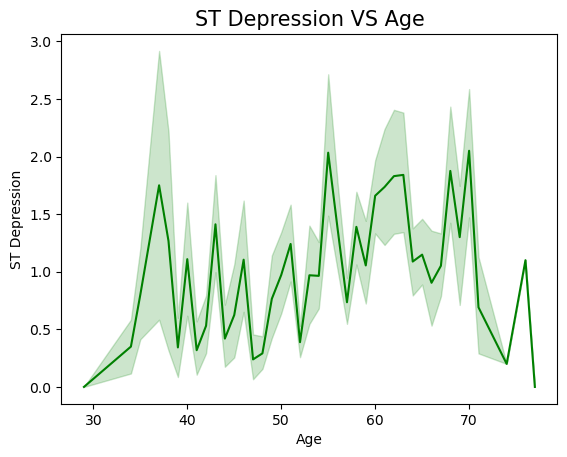

In [44]:
# ST Depression Vs age
sns.lineplot(x="Age" , y = "Oldpeak" , data = df , color = "green")
plt.title("ST Depression VS Age",fontsize = 15)
plt.xlabel("Age",fontsize = 10)
plt.ylabel("ST Depression" , fontsize = 10)
plt.show()

  -> we can observe from here that ST depression mostly increases between the age group of 30-40  
  -> ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below     the baseline.

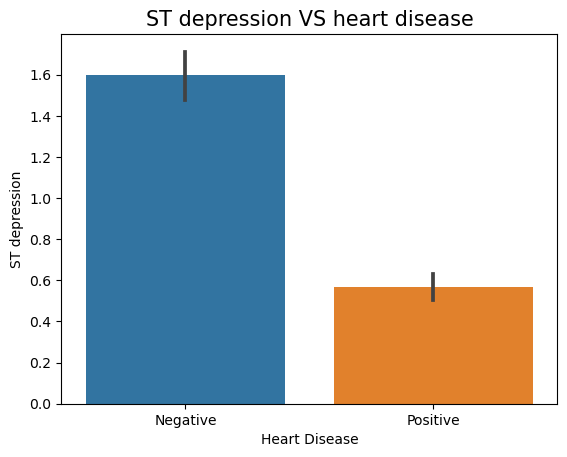

In [45]:
# plot of ST depression VS heart Disease
sns.barplot(x="Heart_disease" , y ="Oldpeak" , data = df)
plt.title("ST depression VS heart disease",fontsize = 15)
plt.xlabel("Heart Disease" , fontsize = 10)
plt.ylabel("ST depression",fontsize = 10)
plt.show()

-> More Males are prone to ST depression as compare to females

#### Multivariate Analysis

In [46]:
df.head()

,Age,Gender,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_sugar,Resting_ECG,Max_heart_rate,Exercise_Induced_angina,Oldpeak,Slope,No_of_Major_Vessels,Thal_defect_Type,Heart_disease,Age_category
0,52,Male,Atypical Angina,125,212,False,having ST-T,168,No,1.0,Down Sloping,2,3,Negative,Elder Aged
1,53,Male,Atypical Angina,140,203,True,Normal,155,Yes,3.1,Up Sloping,0,3,Negative,Elder Aged
2,70,Male,Atypical Angina,145,174,False,having ST-T,125,Yes,2.6,Up Sloping,0,3,Negative,Elder Aged
3,61,Male,Atypical Angina,148,203,False,having ST-T,161,No,0.0,Down Sloping,1,3,Negative,Elder Aged
4,62,Female,Atypical Angina,138,294,True,having ST-T,106,No,1.9,Flat,3,2,Negative,Elder Aged


In [47]:
# Print correlatrion values between variables
df.corr()

,Age,Resting_BP,Cholesterol,Max_heart_rate,Oldpeak,No_of_Major_Vessels,Thal_defect_Type
Age,1.000000,0.271121,0.219823,-0.390227,0.208137,0.271551,0.072297
Resting_BP,0.271121,1.000000,0.127977,-0.039264,0.187434,0.104554,0.059276
Cholesterol,0.219823,0.127977,1.000000,-0.021772,0.064880,0.074259,0.100244
Max_heart_rate,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,-0.207888,-0.098068
Oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,0.221816,0.202672
No_of_Major_Vessels,0.271551,0.104554,0.074259,-0.207888,0.221816,1.000000,0.149014
Thal_defect_Type,0.072297,0.059276,0.100244,-0.098068,0.202672,0.149014,1.000000


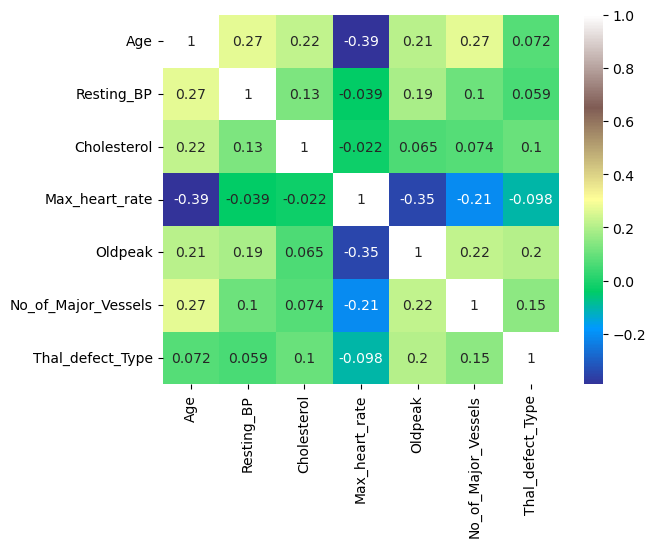

In [48]:
# plot heatmat to see the correlation between the numerical variables of the dataset
sns.heatmap(df.corr(),annot = True , cmap = "terrain")
plt.show()

### Conclusion

 -> From the overall population, people having heart disease (51%) are greater than those who have heart disease(49%)
 
 -> Elder Age People are most affected by Heart Disease and Middle Age People are mostly free from any kind of Heart Disease
 
 -> We can see that Males are mostly tend to have Heart Disease
 
 -> It seems people having Non-Anginal chest pain have a higher chance of heart disease
 
 -> Typical Angina Chest pain means neither causing nor exhibiting symptoms of Heart disease.
 
 -> We can see that a higher number of men are suffering from Typical Angina type of Chest Pain
 
 -> Males have high number of Fasting Blood Sugar over 120
 
 -> Blood Pressure Rate is almost equal in Males and Females but females have little bit of higher cholesterol than males
 
 -> Higher Cholestrol Level and Higher Blood Pressure Level  causes Chances Of Heart Disease.
